In [1]:
import pybaseball as pyb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# Exit Velocity + Launch Angle

Statcast로 다양한 데이터를 측정하면서 타구 속도와 타구 각도는 타격에서 매우 중요한 지표가 되고 있다. 이 두 지표에 따라 타구 결과가 어떻게 변화하는지 확인하기 위해 데이터를 시각화하였다.   

 - 타구 각도: 공이 타자의 방망이에서 발사되는 궤적 각도. 0보다 높으면 공이 공중으로 날아가는 것을 의미하고, 반대로 0보다 작으면 땅볼이 되는 것을 의미한다.

 - 타구 속도: 공이 타자의 방망이에 맞고 나가는 속도. 일반적으로 90mph 이상이면 잘 맞은 타구라고 한다. 

타구 속도와 타구 각도, 두 지표의 효과를 확인하기 위해 MLB 타자인 **Mike Trout** 선수와 **Bryce Harper** 선수의  statcast 기록을 확인하였다.

### **- [Data](#data)**



### **- [Hit Probability by Launch Angle and Exit Velocity](#hit_probability)**

       
       
### **- [Launch Angle and Exit Velocity of Different Hit Types](#hit_type)**



### **- [Hit Type Zone](#zone)**



### **- [Trout vs Harper](#troutharper)**

<a id="data"></a>
## Data Import

In [2]:
pyb.playerid_lookup('trout', 'mike')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,trout,mike,545361,troum001,troutmi01,10155,2011.0,2021.0


In [3]:
pyb.playerid_lookup('harper', 'bryce')

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,harper,bryce,547180,harpb003,harpebr03,11579,2012.0,2021.0


In [4]:
trout = pyb.statcast_batter('2011-01-01', '2022-01-01', 545361)

Gathering Player Data


In [5]:
harper = pyb.statcast_batter('2011-01-01', '2022-01-01', 547180)

Gathering Player Data


----

<a id="hit_probability"></a>
## Hit Probability by Launch Angle and Exit Velocity

Statcast에서는 타구 각도, 타구 속도 뿐만 아니라 'estimated_ba_using_speedangle' 값을 보여준다. 'estimated_ba_using_speedangle'(예상 타율)은 특정 타구 속도, 타구 각도에서의 안타 확률을 보여준다. 이 값을 활용해서 어떤 각도와 속도에서 안타의 확률이 올라가는지 그래프로 확인해보았다.

In [6]:
trout = trout.dropna(subset=['launch_angle', 'launch_speed', 'estimated_ba_using_speedangle'])
harper = harper.dropna(subset=['launch_angle', 'launch_speed', 'estimated_ba_using_speedangle'])

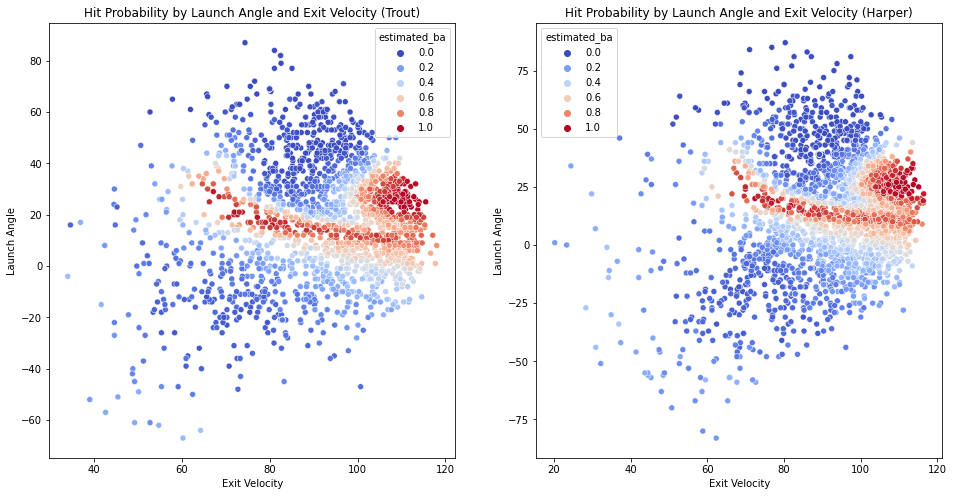

In [27]:
fig, [ax1, ax2] = plt.subplots(figsize=(16,8), nrows=1, ncols=2)
ax1 = plt.subplot(1,2,1)
sns.scatterplot(x='launch_speed', y='launch_angle', data=trout, hue='estimated_ba_using_speedangle', palette='coolwarm')
ax1.set_title('Hit Probability by Launch Angle and Exit Velocity (Trout)')
ax1.legend(title = 'estimated_ba')
ax1.set_xlabel('Exit Velocity')
ax1.set_ylabel('Launch Angle')

ax2 = plt.subplot(1,2,2)
sns.scatterplot(x='launch_speed', y='launch_angle', data=harper, hue='estimated_ba_using_speedangle', palette='coolwarm')
ax2.set_title('Hit Probability by Launch Angle and Exit Velocity (Harper)')
ax2.legend(title = 'estimated_ba')
ax2.set_xlabel('Exit Velocity')
ax2.set_ylabel('Launch Angle')
plt.show()

두 선수의 기록을 그래프로 표현하였지만, 매우 비슷한 모습을 보여주고 있다. 위의 두 그래프를 살펴보면 특정 구역에서 안타 확률이 매우 올라가는 것을 확인할 수 있다. 발사 각도는 15~35도에서 대부분의 타구가 안타로 기록되고 있고, 타구 속도가 커질수록 안타로 기록되는 타구 각도의 범위가 넓어지는 것을 확인할 수 있다.
   
아래에는 예측 안타 확률로 표현되는 것이 아닌, 실제 안타로 기록된 타구의 타구 속도와 타구 각도의 분포를 시각화하여 표현하였다.

----

<a id="hit_type"></a>
## Launch Angle and Exit Velocity of Different Hit Types

In [8]:
hit = ['single', 'double', 'triple', 'home_run']
trout_hit = trout[trout['events'].isin(hit)]
harper_hit = harper[harper['events'].isin(hit)]

Text(0, 0.5, 'Launch Angle')

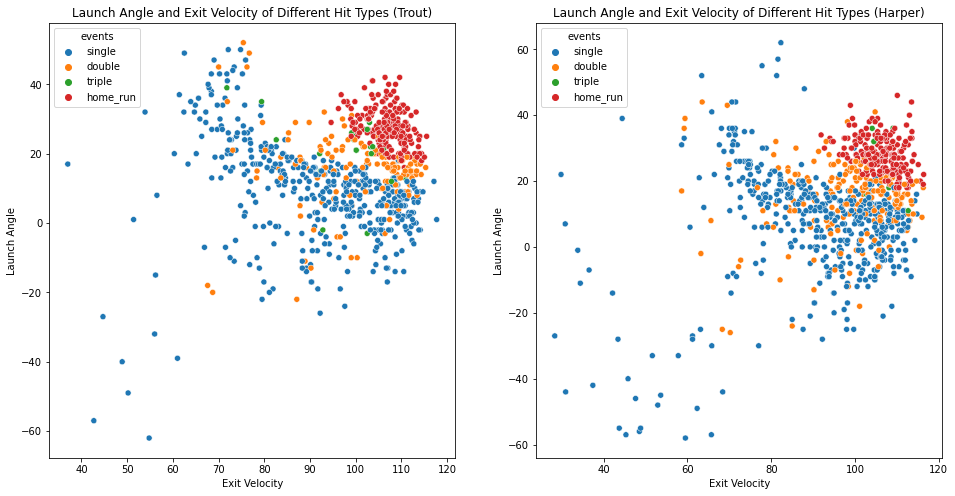

In [9]:
fig, [ax1, ax2] = plt.subplots(figsize=(16,8), nrows=1, ncols=2)
ax1 = plt.subplot(1,2,1)
sns.scatterplot(x='launch_speed', y='launch_angle', data=trout_hit, hue='events', hue_order=['single','double','triple','home_run'])
ax1.set_title('Launch Angle and Exit Velocity of Different Hit Types (Trout)')
ax1.set_xlabel('Exit Velocity')
ax1.set_ylabel('Launch Angle')

ax2 = plt.subplot(1,2,2)
sns.scatterplot(x='launch_speed', y='launch_angle', data=harper_hit, hue='events', hue_order=['single','double','triple','home_run'])
ax2.set_title('Launch Angle and Exit Velocity of Different Hit Types (Harper)')
ax2.set_xlabel('Exit Velocity')
ax2.set_ylabel('Launch Angle')

이번에도 두 선수의 그래프가 굉장히 유사한 모습을 보여준다. 단타와 2루타, 홈런의 영역이 뚜렷히 구분되는 것이 보인다. 단타는 비교적 넓은 범위의 타구 속도와 타구 각도의 영역을 보여주는 반면에 장타(2루타, 홈런)는 좁은 구역에 형성되어 있다. 타구 속도가 90mph 이상이고, 타구 각도가 15~45도 정도이면, 대부분 장타를 기록하는 모습을 보여준다.   
   


----

<a id="zone"></a>
## Hit Type Zone

아래의 그림은 타구 속도와 타구 각도를 구분지은 타격 Zone을 보여준다. 타격 Zone은 총 6개로 'Weak', 'Topped', 'Under', 'Flare/Burner', 'Solid Contact', 'Barrel'로 나뉘고, 해당 구역에 해당되는 타구의 예상 타율에 대한 정보를 보여준다. 아래 그림에서 나누어진 Zone의 분포가 Trout과 Harper의 기록에 어떻게 나타나는지 확인하기 위해 시각화하였다.

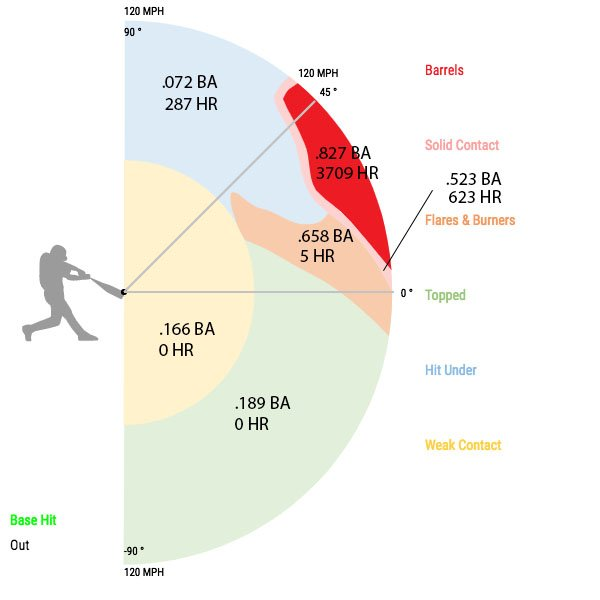

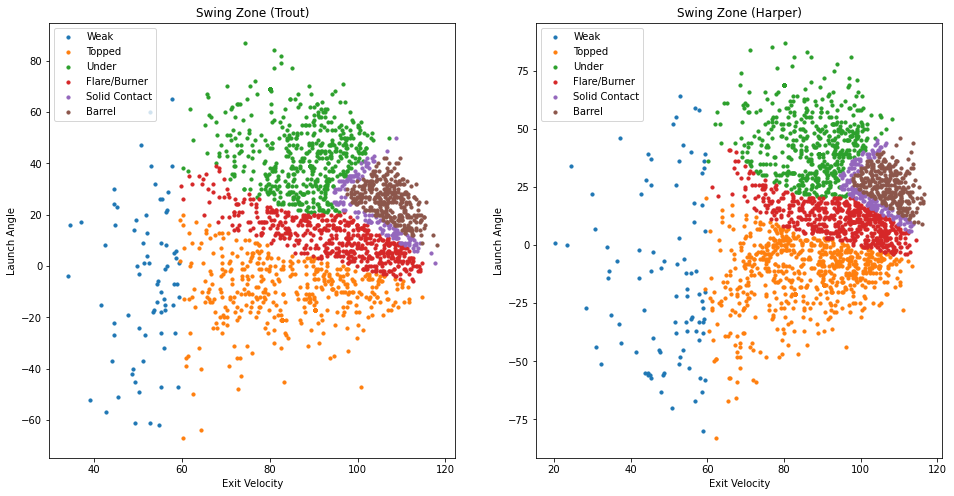

In [10]:
launch_zone_trout = trout.groupby('launch_speed_angle')
launch_zone_harper = harper.groupby('launch_speed_angle')

fig, [ax1, ax2] = plt.subplots(figsize=(16,8), nrows=1, ncols=2)
ax1 = plt.subplot(1,2,1)
for name, group in launch_zone_trout:
    if name == 1.0:
        zone = 'Weak'
    elif name == 2.0:
        zone = 'Topped'
    elif name == 3.0:
        zone = 'Under'
    elif name == 4.0:
        zone ='Flare/Burner'
    elif name == 5.0:
        zone = 'Solid Contact'
    else:
        zone = 'Barrel'
    plt.scatter(group['launch_speed'], group['launch_angle'], s=10, label=zone)
plt.xlabel('Exit Velocity')
plt.ylabel('Launch Angle')
plt.title('Swing Zone (Trout)')
plt.legend()

ax2 = plt.subplot(1,2,2)
for name, group in launch_zone_harper:
    if name == 1.0:
        zone = 'Weak'
    elif name == 2.0:
        zone = 'Topped'
    elif name == 3.0:
        zone = 'Under'
    elif name == 4.0:
        zone ='Flare/Burner'
    elif name == 5.0:
        zone = 'Solid Contact'
    else:
        zone = 'Barrel'
    plt.scatter(group['launch_speed'], group['launch_angle'], s=10, label=zone)
plt.xlabel('Exit Velocity')
plt.ylabel('Launch Angle')
plt.title('Swing Zone (Harper)')
plt.legend()
plt.show()

위의 그래프와 타구별 분포 그래프를 비교해보면, 보라색과 갈색 구역('Solid Contact', 'Barrel')에서 장타가 이루어진다는 것을 알 수 있다. 빨간 구역('Flare/Burner')은 단타의 분포와 비슷한 형태를 보여준다. 
   


----

<a id="troutharper"></a>
## Trout vs Harper

아래에는 Trout과 Harper 두 타자의 각 Zone에서의 타구가 어떤 결과를 나타내었는지에 대한 비율을 계산해 테이블로 표현하였다. 

In [11]:
trout['events'].unique()

array(['field_out', 'single', 'home_run', 'grounded_into_double_play',
       'double', 'triple', 'field_error', 'force_out', 'fielders_choice',
       'sac_fly', 'fielders_choice_out', 'double_play'], dtype=object)

In [12]:
def fix_outs(x):
    plays = ['sac_fly_double_play', 'fielders_choice', 'sac_fly', 
             'grounded_into_double_play', 'fielders_choice_out', 
             'force_out', 'double_play']
    if x in plays:
        return 'field_out'
    return x

In [13]:
trout['events_fixed'] = trout['events'].apply(fix_outs)
trout = trout[trout['events_fixed'] != 'field_error']

df_trout = trout.groupby(['launch_speed_angle','events_fixed']).count()[['pitch_type']].reset_index()
df_trout['Percent of Events'] = round(df_trout.groupby('launch_speed_angle').transform(lambda x: x/x.sum()),1)

df_trout = df_trout.rename(columns = {'launch_speed_angle' : 'Zone', 'events_fixed' :'Play Result', 'pitch_type' : 'Count'})
table2_trout = df_trout.pivot(index='Zone', columns='Play Result', values='Percent of Events').fillna(0)

column_order = ['field_out', 'single', 'double','triple','home_run']

table_trout = table2_trout.reindex(column_order, axis=1)
table_trout = table_trout.rename(index={1.0: 'Weak', 2.0: 'Topped', 3.0: 'Under', 4.0: 'Flare/Burner', 5.0: 'Solid Contact', 6.0: 'Barrel'})

In [14]:
harper['events_fixed'] = harper['events'].apply(fix_outs)
harper = harper[harper['events_fixed'] != 'field_error']

df_harper = harper.groupby(['launch_speed_angle','events_fixed']).count()[['pitch_type']].reset_index()
df_harper['Percent of Events'] = round(df_harper.groupby('launch_speed_angle').transform(lambda x: x/x.sum()),1)

df_harper = df_harper.rename(columns = {'launch_speed_angle' : 'Zone', 'events_fixed' :'Play Result', 'pitch_type' : 'Count'})
table2_harper = df_harper.pivot(index='Zone', columns='Play Result', values='Percent of Events').fillna(0)

table_harper = table2_harper.reindex(column_order, axis=1)
table_harper = table_harper.rename(index={1.0: 'Weak', 2.0: 'Topped', 3.0: 'Under', 4.0: 'Flare/Burner', 5.0: 'Solid Contact', 6.0: 'Barrel'})

In [15]:
cm1 = sns.color_palette("coolwarm", as_cmap=True)

heading_properties = [('font-size', '14px'), ('background-color', 'lightgrey'), ('border', '1px solid black')]
cell_properties = [('font-size', '16px'), ('border', '1px solid black')]
caption_properties = [('font-size', '30px'), ('color', 'black'), ('text-align', 'center')]
dfstyle = [dict(selector="th", props=heading_properties),
           dict(selector="td", props=cell_properties),
           dict(selector='caption', props=caption_properties)]

table_trout = (table_trout.style
            .set_caption('Mike Trout')
            .set_table_styles(dfstyle)
            .format('{:.1%}')
            .background_gradient(cmap=cm1, axis=1, vmin=0, vmax=1))

table_harper = (table_harper.style
            .set_caption('Bryce Harper')
            .set_table_styles(dfstyle)
            .format('{:.1%}')
            .background_gradient(cmap=cm1, axis=1, vmin=0, vmax=1))

In [16]:
table_trout

Play Result,field_out,single,double,triple,home_run
Zone,,,,,
Weak,80.0%,20.0%,0.0%,0.0%,0.0%
Topped,80.0%,20.0%,0.0%,0.0%,0.0%
Under,90.0%,0.0%,0.0%,0.0%,0.0%
Flare/Burner,30.0%,60.0%,10.0%,0.0%,0.0%
Solid Contact,50.0%,20.0%,20.0%,0.0%,10.0%
Barrel,20.0%,0.0%,20.0%,0.0%,60.0%


In [17]:
table_harper

Play Result,field_out,single,double,triple,home_run
Zone,,,,,
Weak,70.0%,30.0%,0.0%,0.0%,0.0%
Topped,80.0%,20.0%,0.0%,0.0%,0.0%
Under,90.0%,0.0%,0.0%,0.0%,0.0%
Flare/Burner,40.0%,50.0%,10.0%,0.0%,0.0%
Solid Contact,60.0%,10.0%,20.0%,0.0%,10.0%
Barrel,20.0%,0.0%,10.0%,0.0%,60.0%


두 타자의 테이블을 살펴보면 Weak존, Topped존, Under존에서 아웃의 비율이 매우 높은 것을 확인할 수 있다. Flare/Burner존에서 50% 이상이 단타 이상의 결과를 보여주었고 아웃은 40% 아래였다. Solid Contact존에서는 눈에 띄게 장타의 비율이 높아지고 홈런도 5%이상 기록되었다. Barrel존에서는 무려 60% 정도가 홈런으로 기록되었다.

아래에는 Trout과 Harper 두 선수의 타구 결과가 각 존에 얼만큼 분포되어있는지 확인할 수 있는 테이블을 제작하였다. 각 존은 아웃과 단타, 장타를 예측할 수 있기 때문에, 아래 테이블은 선수의 성적을 대략적으로 예상할 수 있게 해준다.

In [18]:
zone_percent_t = trout['launch_speed_angle'].value_counts(normalize=True).reset_index().sort_values(by='index',ascending=True)
zone_percent_t.rename(columns = {'index':'Zone', 'launch_speed_angle' : 'Percent of Swing'}, inplace=True)
zone_percent_t.set_index('Zone', inplace=True)
zone_percent_t.rename(index={1.0: 'Weak', 2.0: 'Topped', 3.0: 'Under', 4.0: 'Flare/Burner', 5.0: 'Solid Contact', 6.0: 'Barrel'}, inplace=True)
zone_percent_t['Percent of Swing'] = round(zone_percent_t['Percent of Swing'],3)

zone_percent_t = (zone_percent_t.style
            .set_caption('Mike Trout')
            .set_table_styles(dfstyle)
            .format('{:.1%}')
            .background_gradient(cmap=cm1, axis=1, vmin=0, vmax=0.3))

In [19]:
zone_percent_t

,Percent of Swing
Zone,
Weak,3.5%
Topped,22.2%
Under,26.2%
Flare/Burner,24.8%
Solid Contact,6.9%
Barrel,16.4%


In [20]:
zone_percent_h = harper['launch_speed_angle'].value_counts(normalize=True).reset_index().sort_values(by='index',ascending=True)
zone_percent_h.rename(columns = {'index':'Zone', 'launch_speed_angle' : 'Percent of Swing'}, inplace=True)
zone_percent_h.set_index('Zone', inplace=True)
zone_percent_h.rename(index={1.0: 'Weak', 2.0: 'Topped', 3.0: 'Under', 4.0: 'Flare/Burner', 5.0: 'Solid Contact', 6.0: 'Barrel'}, inplace=True)
zone_percent_h['Percent of Swing'] = round(zone_percent_h['Percent of Swing'],3)

zone_percent_h = (zone_percent_h.style
            .set_caption('Bryce Harper')
            .set_table_styles(dfstyle)
            .format('{:.1%}')
            .background_gradient(cmap=cm1, axis=1, vmin=0, vmax=0.3))

In [21]:
zone_percent_h

,Percent of Swing
Zone,
Weak,3.7%
Topped,28.5%
Under,23.5%
Flare/Burner,24.1%
Solid Contact,7.0%
Barrel,13.2%
